In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import json
import os
import shutil
from PIL import Image
from tqdm import tqdm_gui, tqdm

data_root = '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34'

In [4]:
src_filename_list = []
dst_filename_list = []

for filename in os.listdir(os.path.join(data_root, 'Real')):
    if filename.endswith('BMP'):
        src_filename_list.append(filename)
        dst_filename_list.append((
            f"{filename.split('.')[0]}_Zcut.BMP",
            f"{filename.split('.')[0]}_Obl.BMP",
            f"{filename.split('.')[0]}_CR.BMP"
        ))
    else:
        continue

In [6]:
print(src_filename_list[:2])
print(dst_filename_list[:2])

['523__F_Left_little_finger.BMP', '531__M_Right_middle_finger.BMP']
[('523__F_Left_little_finger_Zcut.BMP', '523__F_Left_little_finger_Obl.BMP', '523__F_Left_little_finger_CR.BMP'), ('531__M_Right_middle_finger_Zcut.BMP', '531__M_Right_middle_finger_Obl.BMP', '531__M_Right_middle_finger_CR.BMP')]


In [10]:
import random

positive_pair_list = []

for src_filename in src_filename_list:
    src_path = os.path.join(data_root, 'Real', src_filename)
    positive_pair_list.append(
        (src_path, src_path, 0)
    )

print("동일 이미지 매칭 개수 :", len(positive_pair_list))

dst_dir_list = ['Altered-Easy', 'Altered-Hard', 'Altered-Medium']
for src_filename, dst_filenames in zip(src_filename_list, dst_filename_list):
    for dst_fname in dst_filenames:
        for dst_dir in dst_dir_list:
            src_path = os.path.join(data_root, 'Real', src_filename)
            dst_path = os.path.join(data_root, 'Altered', dst_dir,  dst_fname)

            ## 파일이 없을 경우 생략한다.
            if (not os.path.exists(src_path)) or (not os.path.exists(dst_path)):
                continue
            positive_pair_list.append(
                (src_path, dst_path, 0)
            )
print("src, dst 이미지 매칭 개수 :", len(positive_pair_list))

동일 이미지 매칭 개수 : 6000
src, dst 이미지 매칭 개수 : 55270


In [13]:
import random

negative_pair_list = []
dst_dir_list = ['Altered-Easy', 'Altered-Hard', 'Altered-Medium']


for i in tqdm(range(len(src_filename_list))):
    for j in range(i+1, len(src_filename_list)):
        if random.randint(1, 3) != 1: ## 30%의 데이터만 매칭함
            continue
        src_filename1 = src_filename_list[i]
        src_filename2 = src_filename_list[j]
        src1_path = os.path.join(data_root, 'Real', src_filename1)
        src2_path = os.path.join(data_root, 'Real', src_filename2)
        negative_pair_list.append(
            [src1_path, src2_path, 1]
        )
print("src 이미지 매칭 개수 :", len(negative_pair_list))


for src_filename in tqdm(src_filename_list): ## src 이미지
    random_dst_filename_list = random.sample(dst_filename_list, 100) ## 랜덤하게 100개만 추출하여 매칭
    for dst_filenames in random_dst_filename_list:
        rand_idx = random.randint(0, 2) ## 랜덤으로 한 개 선택
        dst_fname = dst_filenames[rand_idx]
        if src_filename in dst_fname: ## 같은 지문은 매칭에서 제외 (negative pair 생성)
            continue
        for dst_dir in dst_dir_list:
            src_path = os.path.join(data_root, 'Real', src_filename)
            dst_path = os.path.join(data_root, 'Altered', dst_dir,  dst_fname)

            ## 파일이 없을 경우 생략
            if (not os.path.exists(src_path)) or (not os.path.exists(dst_path)):
                continue
            negative_pair_list.append(
                [src_path, dst_path, 1]
            )
print("src, dst 이미지 매칭 개수 :", len(negative_pair_list))

100%|██████████| 6000/6000 [00:45<00:00, 132.08it/s] 


src 이미지 매칭 개수 : 5997548


100%|██████████| 6000/6000 [14:37<00:00,  6.84it/s]

src, dst 이미지 매칭 개수 : 7640162


In [14]:
print(f"전체 positive pair 개수 : {len(positive_pair_list)}")
print(f"전체 negative pair 개수 : {len(negative_pair_list)}")

전체 positive pair 개수 : 55270
전체 negative pair 개수 : 7640162


In [15]:
sampled_negative_pair_list = random.sample(negative_pair_list, len(positive_pair_list))

annotations = positive_pair_list + sampled_negative_pair_list
random.shuffle(annotations) ## 데이터 셔플
print(f"전체 positive pair 개수 : {len(positive_pair_list)}")
print(f"샘플링 한 negative pair 개수 : {len(sampled_negative_pair_list)}")
print(f"전체 데이터 개수 : {len(annotations)}")

전체 positive pair 개수 : 55270
샘플링 한 negative pair 개수 : 55270
전체 데이터 개수 : 110540


In [16]:
annotations[0:10]

[['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Real/153__M_Right_thumb_finger.BMP',
  '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Real/105__M_Left_ring_finger.BMP',
  1],
 ['/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Real/480__M_Left_index_finger.BMP',
  '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Real/118__F_Right_index_finger.BMP',
  1],
 ('/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Real/334__F_Right_thumb_finger.BMP',
  '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Altered/Altered-Medium/334__F_Right_thumb_finger_Zcut.BMP',
  0),
 ('/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Real/143__M_Right_ring_finger.BMP',
  '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/chapter34/Altered/Altered-Easy/143__M_Right_ring_finger_Obl.BMP',
  0),
 ('/content/drive/Othercomputers/내 Mac/Chapter 31

In [17]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from PIL import Image
import numpy as np


class PairDataset(Dataset):
    def __init__(self,
                 annotations,
                 transform=None):
        self.annotations = annotations
        self.transform = transform
        self.class_list = [0, 1]
        self.num_classes = len(self.class_list)

    def __len__(self):
        return len(self.annotations) # 데이터 개수

    def __getitem__(self, idx):

        annot = self.annotations[idx]
        image1_path, image2_path, label = annot
        image1 = Image.open(image1_path).convert("RGB")
        image2 = Image.open(image2_path).convert("RGB")

        if self.transform:
            image1 = self.transform(image=np.array(image1))['image']
            image2 = self.transform(image=np.array(image2))['image']

        target = torch.tensor(label, dtype=torch.long)

        return image1, image2, target

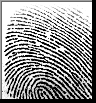

In [18]:
dataset = PairDataset(annotations=annotations)
data = dataset[2]
data[0]

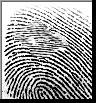

In [19]:
data[1]

In [20]:
data[2]

tensor(0)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def draw_images(images, classes):
    fig, axs = plt.subplots(4, 2, figsize=(12, 6))

    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.set_title(classes[i])

    plt.tight_layout()
    plt.show()

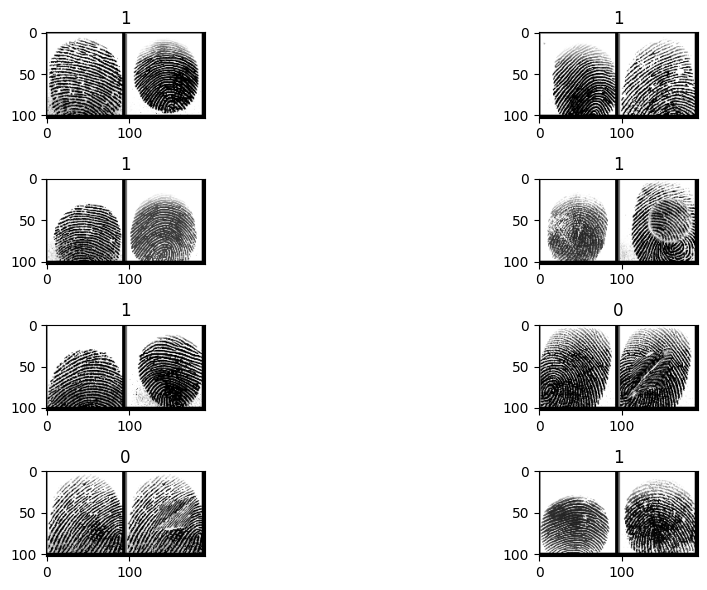

In [22]:
from PIL import Image
import numpy as np
import random


def image_concat(image1, image2):
    width1, height1 = image1.size
    width2, height2 = image2.size
    new_width = width1 + width2
    new_height = max(height1, height2)

    concat_image = Image.new('RGB', (new_width, new_height))
    concat_image.paste(image1, (0, 0))

    concat_image.paste(image2, (width1, 0))

    return concat_image

random.shuffle(annotations)


sample_images = []
sample_classes = []
sample_cnt = 0
max_cnt = 8
for annot in annotations:
    image1_path, image2_path, label = annot
    sample_classes.append(label)
    image1 = Image.open(image1_path).convert('RGB')
    image2 = Image.open(image2_path).convert('RGB')

    merged_image = image_concat(image1, image2)

    sample_images.append(merged_image)
    sample_cnt += 1
    if sample_cnt == max_cnt:
        break

draw_images(sample_images, sample_classes)

In [23]:
len_annot = len(annotations)
train_annot = annotations[ : int(len_annot * 0.9)]
val_annot = annotations[int(len_annot * 0.9) : ]

print(f'학습 데이터 개수 : {len(train_annot)}')
print(f'검증 데이터 개수 : {len(val_annot)}')

학습 데이터 개수 : 99486
검증 데이터 개수 : 11054


In [24]:
hyper_params = {
    'num_epochs': 3,
    'lr': 0.0001,
    'image_size': 128,
    'train_batch_size': 32,
    'val_batch_size': 16,
    'print_preq': 0.1
}

In [27]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

sample_transform = A.Compose([
    A.ShiftScaleRotate(rotate_limit=15, shift_limit=0.05, scale_limit=0.1, p=0.5, border_mode=0),
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  value = 0,
                  always_apply=True,
                  border_mode=0),
    # A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ## 이미지 픽셀 값 정규화
    # ToTensorV2() ## 모델에 입력할 때 사용
])

sample_dataset = PairDataset(annotations=annotations,
                             transform=sample_transform)

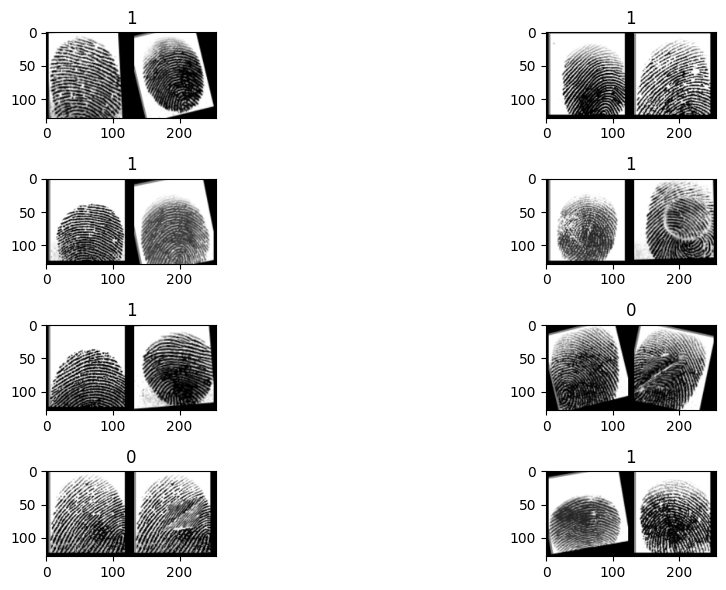

In [28]:
transformed_images = []
targets = []

max_cnt = 8
for idx, (image1, image2, target) in enumerate(sample_dataset):
    if idx == max_cnt:
        break
    merged_image = image_concat(Image.fromarray(image1), Image.fromarray(image2))
    transformed_images.append(np.array(merged_image))
    targets.append(int(target))

draw_images(transformed_images, targets)

In [30]:
# 학습 및 검증 이미지 변환 모듈 설정
train_transform = A.Compose([
    A.ShiftScaleRotate(rotate_limit=15, shift_limit=0.05, scale_limit=0.1, p=0.5, border_mode=0),
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  value = 0,
                  always_apply=True,
                  border_mode=0),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ## 이미지 픽셀 값 정규화
    ToTensorV2() ## 모델에 입력할 때 사용
])

val_transform = A.Compose([
    A.LongestMaxSize(max_size=hyper_params['image_size'],
                     always_apply=True),
    A.PadIfNeeded(min_height=hyper_params['image_size'],
                  min_width=hyper_params['image_size'],
                  value = 0,
                  always_apply=True,
                  border_mode=0),
    A.Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ## 이미지 픽셀 값 정규화
    ToTensorV2() ## 모델에 입력할 때 사용
])

# 학습 데이터세트 및 데이터로더 설정
train_dataset = PairDataset(annotations=train_annot,
                            transform=train_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, num_workers=4, batch_size=hyper_params['train_batch_size'], shuffle=True)

# 검증 데이터세트 및 데이터로더 설정
val_dataset = PairDataset(annotations=val_annot,
                          transform=val_transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset, num_workers=4, batch_size=hyper_params['val_batch_size'], shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [31]:
import torch
import torch.nn as nn
import timm
from torch.optim import Adam

class SiameseModel(nn.Module):
    def __init__(self):
        super(SiameseModel, self).__init__()
        self.base_model = timm.create_model('resnet18', pretrained=True, num_classes=0)

    def forward_once(self, x):
        return self.base_model(x)

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

In [32]:
model = SiameseModel()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [33]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [37]:
print(device)

cuda


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

criterion = ContrastiveLoss()
optimizer = optim.AdamW(model.parameters(), lr=hyper_params['lr'])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = hyper_params['num_epochs']
model_save_dir = '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/part2_chapter34_train_results'
os.makedirs(model_save_dir, exist_ok=True)

min_loss = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    epoch_loss = 0.0
    print_cnt = int(len(train_dataloader) * hyper_params['print_preq'])

    for idx, (image1, image2, targets) in enumerate(train_dataloader):
        image1, image2, targets = image1.to(device), image2.to(device), targets.to(device)

        output1, output2 = model(image1, image2)
        loss = criterion(output1, output2, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()

        if idx % print_cnt == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Iter [{idx}/{len(train_dataloader)}] "
                  f"Loss: {running_loss/print_cnt:.4f}")
            running_loss = 0.0

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_dataloader):.4f}")

    model_save_path = os.path.join(model_save_dir, f'{epoch}_model.pth')
    torch.save(model.state_dict(), model_save_path)


    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for image1, image2, targets in val_dataloader:
            image1, image2, targets = image1.to(device), image2.to(device), targets.to(device)
            output1, output2 = model(image1, image2)
            loss = criterion(output1, output2, targets)
            val_loss += loss.item()
    val_loss /= len(val_dataloader)

    if val_loss < min_loss:
        model_save_path = os.path.join(model_save_dir, f'best_model.pth')
        torch.save(model.state_dict(), model_save_path)
        min_loss = val_loss

    print(f"Val Loss : {val_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/3], Iter [0/3109] Loss: 0.0143
Epoch [1/3], Iter [310/3109] Loss: 0.7651
Epoch [1/3], Iter [620/3109] Loss: 0.1937
Epoch [1/3], Iter [930/3109] Loss: 0.1458
Epoch [1/3], Iter [1240/3109] Loss: 0.1058
Epoch [1/3], Iter [1550/3109] Loss: 0.0805
Epoch [1/3], Iter [1860/3109] Loss: 0.0691
Epoch [1/3], Iter [2170/3109] Loss: 0.0580
Epoch [1/3], Iter [2480/3109] Loss: 0.0542
Epoch [1/3], Iter [2790/3109] Loss: 0.0502
Epoch [1/3], Iter [3100/3109] Loss: 0.0448
Epoch [1/3], Loss: 0.1578
Val Loss : 0.0205
Epoch [2/3], Iter [0/3109] Loss: 0.0001
Epoch [2/3], Iter [310/3109] Loss: 0.0415
Epoch [2/3], Iter [620/3109] Loss: 0.0387
Epoch [2/3], Iter [930/3109] Loss: 0.0364
Epoch [2/3], Iter [1240/3109] Loss: 0.0344
Epoch [2/3], Iter [1550/3109] Loss: 0.0320
Epoch [2/3], Iter [1860/3109] Loss: 0.0295
Epoch [2/3], Iter [2170/3109] Loss: 0.0282
Epoch [2/3], Iter [2480/3109] Loss: 0.0263
Epoch [2/3], Iter [2790/3109] Loss: 0.0257
Epoch [2/3], Iter [3100/3109] Loss: 0.0250
Epoch [2/3], Loss: 0.0

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weight_path = os.path.join('/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/part2_chapter34_train_results', 'best_model.pth')

model = SiameseModel().eval().to(device)
model.load_state_dict(torch.load(weight_path))

feature_vector_list = []
with torch.no_grad():
    for filename in tqdm(src_filename_list):
        image_path = os.path.join(data_root, 'Real', filename)
        image = Image.open(image_path).convert('RGB')

        image = val_transform(image=np.array(image))['image'].unsqueeze(0).to(device)
        feature_vector = model.forward_once(image).detach().cpu().numpy()[0]
        feature_vector_list.append(feature_vector)
feature_vector_list = np.array(feature_vector_list)

<ipython-input-47-716fdb1a1f42>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_path))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/내 Mac/Chapter 31 ~ Chapter 45/part2_chapter34_train_results/best_model.pth'

In [40]:
print(f"전체 feature vector의 shape : {feature_vector_list.shape}")

전체 feature vector의 shape : (6000, 512)


In [41]:
dst_filenames = random.sample(dst_filename_list, 1)[0]
dst_filename = random.sample(dst_filenames, 1)[0]
dst_dir_list = ['Altered-Easy', 'Altered-Hard', 'Altered-Medium']
dst_dir = random.sample(dst_dir_list, 1)[0]


with torch.no_grad():
    image_path = os.path.join(data_root, 'Altered', dst_dir, dst_filename)
    image = Image.open(image_path).convert('RGB')

    image = val_transform(image=np.array(image))['image'].unsqueeze(0).to(device)
    query_vector = model.forward_once(image).detach().cpu().numpy()

In [42]:
distances = np.linalg.norm(feature_vector_list - query_vector, axis=1)

min_index = np.argmin(distances)
result = src_filename_list[min_index]

In [43]:
print(dst_filename)

194__M_Right_thumb_finger_Zcut.BMP


In [44]:
print(result)

194__M_Right_thumb_finger.BMP


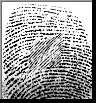

In [45]:
Image.open(image_path)

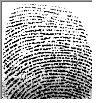

In [46]:
Image.open(os.path.join(data_root, 'Real', result))